In [85]:
__file__ = 'A1.ipynb'
import sys
import pathlib
sys.path.append(str(pathlib.Path(__file__).absolute().parent.parent)+"/FP4_lib")
import functions as f
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from uncertainties import unumpy as up
from uncertainties import ufloat
import scipy.constants as const
import scipy.fft as fft
import lmfit

In [86]:
with open('Data/Aufgabe_3.txt','r') as tf:
    data = np.genfromtxt(tf).T
with open('Res/cp-cal_res.txt','r') as tf:
    cal = np.genfromtxt(tf).T
data = f.channel_to_pos(data,cal)
scale = 2/5.127868608985219#*1e-3
#data[0] = data[0]*scale
#data[2] = data[2]*scale

In [87]:
data[1] = data[1]*100
yerr = 0.035339825186025027*np.abs(data[1])
print(np.mean(data[2]))

0.0012903333856597225


von 4.255
bis 5.868

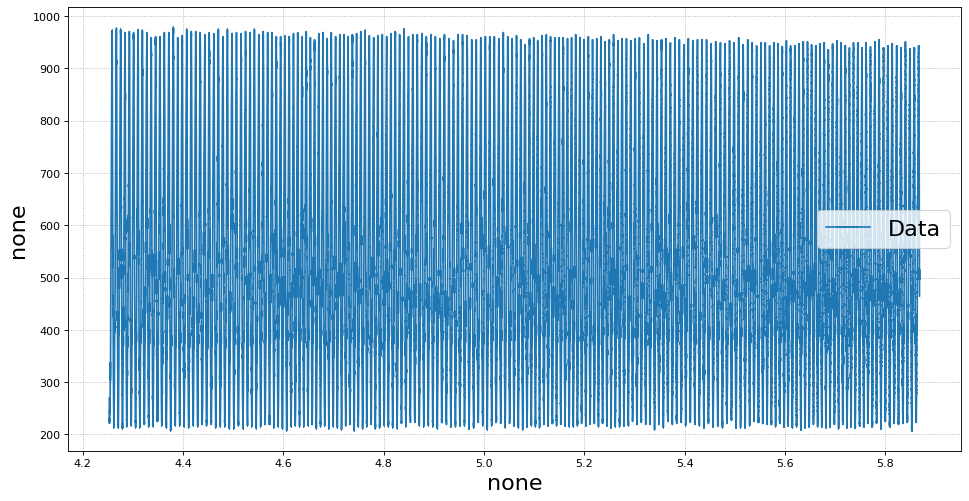

In [88]:
f.figsize(2)
plt.errorbar(data[0],data[1],xerr=data[2],label = 'Data')

f.form()
#f.form([4.4,5])[4.255,5.868]

[[Model]]
    Model(sin)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 35
    # data points      = 2000
    # variables        = 4
    chi-square         = 6.8222e+12
    reduced chi-square = 3.4179e+09
    Akaike info crit   = 43908.6001
    Bayesian info crit = 43931.0037
    R-squared          = -54975.8122
[[Variables]]
    a:  342.364814 +/- 1.90128547 (0.56%) (init = 4)
    b:  747.432426 +/- 0.19176555 (0.03%) (init = 705)
    c: -196.665244 +/- 0.89150472 (0.45%) (init = -6)
    d: -1.16848669 +/- 1.34427921 (115.04%) (init = 6)
[[Correlations]] (unreported correlations are < 0.100)
    C(b, c) = -1.000


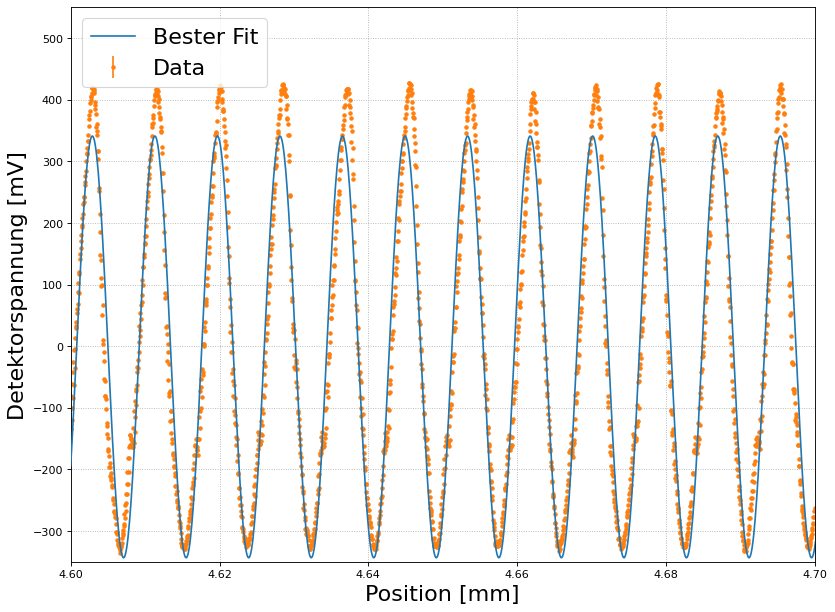

In [89]:
von , bis = f.pos(data[0],4.6),f.pos(data[0],4.7)

data[1] -= np.mean(data[1])
scale = 2/5.127868608985219

def sin(x,a,b,c,d):
    return a*np.sin(b*x+c)+d


model_func = lmfit.model.Model(sin)  

#parameter erstellen
pars_func = model_func.make_params()



pars_func["a"].set(value=4)#,min=0.01,max=1)
pars_func["b"].set(value=705)#,min=0.01,max=1)
pars_func["c"].set(value=-6)#,min=0.01,max=1)
pars_func["d"].set(value=6)#,min=0.01,max=1)
#Fitten
res = model_func.fit(data[1][von:bis],x=data[0][von:bis],params=pars_func,weights=1/data[2][von:bis],nan_policy='propagate')
print(res.fit_report())


f.figsize(1)
plt.plot(np.arange(4.2,5.8,0.0001),res.eval(x=np.arange(4.2,5.8,0.0001)),zorder = 10,label='Bester Fit')
plt.errorbar(data[0][von:bis],data[1][von:bis],yerr = data[2][von:bis],fmt='.',label = 'Data')
plt.ylim(-350,550)
f.form([4.6,4.7],xlabel='Position [mm]',ylabel='Detektorspannung [mV]',name='Res/A3_sinfit.pdf')


In [90]:
freq = ufloat(res.params['b'].value,res.params['b'].stderr)
print(1e-3/freq)
print((1e-3/freq)*scale)

(1.33791+/-0.00034)e-06
(5.2182+/-0.0013)e-07


[[Model]]
    Model(sine)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 30
    # data points      = 32298
    # variables        = 3
    chi-square         = 7915556.46
    reduced chi-square = 245.101609
    Akaike info crit   = 177696.030
    Bayesian info crit = 177721.178
    R-squared          = 0.99601695
[[Variables]]
    amplitude:  200.268603 +/- 1.68005830 (0.84%) (init = 171.8254)
    frequency:  735.618750 +/- 0.01813157 (0.00%) (init = 735.3187)
    shift:      3.47169412 +/- 0.09217633 (2.66%) (init = 5.140788)
[[Correlations]] (unreported correlations are < 0.100)
    C(frequency, shift) = -0.996


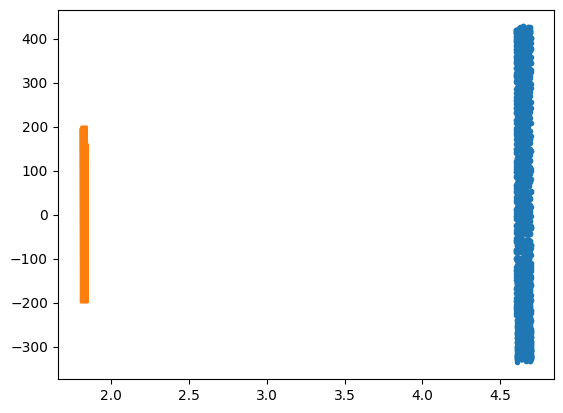

In [91]:
plt.errorbar(data[0][von:bis],data[1][von:bis],yerr = data[2][von:bis],fmt='.',label = 'Data')

res = f.sinfit(data[1],data[0],yerr)

plt.plot(np.arange(1.8,1.85,0.0001),res.eval(x=np.arange(1.8,1.85,0.0001)))
print(res.fit_report())

In [92]:
freq = ufloat(res.params['frequency'].value,res.params['frequency'].stderr)
print(1e-3/freq)

(1.359400+/-0.000034)e-06
